In [1]:
import pandas as pd
import numpy as np

In [2]:
path = r'D:\DevRoot\DataSet\train.csv'

In [3]:
df = pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 타이타닉호 객실별 성별 인원

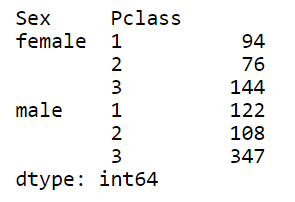

In [5]:
df.groupby(['Sex', 'Pclass']).size()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
dtype: int64

In [6]:
df.groupby(['Sex', 'Pclass']).size().unstack()  # unstack(-1)  # index -> column 으로 올라간다

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [7]:
df.groupby(['Sex', 'Pclass']).size().unstack(-2) 

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [ ]:
# 위와 같은 것을 cross table (교차표) 다

## pd.crosstab() 으로 cross table 만들기

In [8]:
df.Sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [9]:
df.Pclass

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [10]:
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


# TODO: 타이타닉호 객실별 남녀 생존률 구하기

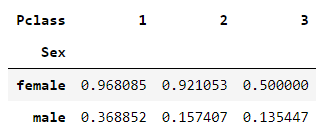

In [ ]:
# 위와 같은 Pivot table 만들기

# 1. groupby() + agg() + unstack() 사용
# 2. pivot_table() 사용

In [13]:
df.groupby(['Sex', 'Pclass']).size()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
dtype: int64

In [14]:
df.groupby(['Sex', 'Pclass']).agg({"Survived": "mean"})

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [15]:
df.groupby(['Sex', 'Pclass']).agg({"Survived": "mean"}).unstack()

Survived                    
Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

#### pivot_table() 사용

In [16]:
df.pivot_table("Survived", "Sex", "Pclass", aggfunc="mean")

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


# groupby(axis = )  축을 바꾸어 그룹핑 

In [17]:
df = pd.DataFrame(
    np.arange(16).reshape(4, 4) * 100,
    columns=[
        "c_코스맥스", "c_아모레퍼시픽", "i_넷마블", "i_네오위즈",
    ]
)
df

,c_코스맥스,c_아모레퍼시픽,i_넷마블,i_네오위즈
0,0,100,200,300
1,400,500,600,700
2,800,900,1000,1100
3,1200,1300,1400,1500


In [18]:
# 화장품군은 'c' 로 시작하는 컬럼을, it 관련 컬럼을 'i' 를...
# 이러한 형태의 DataFrame 에서 c 와 i 끼리 묶어서 실적 비교하고 싶을 거다

#  ★★이때는 groupby 를 하는 '축' 을 변경해주면 된다!  ★★

# 일반적으로는:  groupby(컬럼명)   이었다.
# df.groupby?

# 위 도움말에서 보면 기본적으로 axis=0 으로 되어 있다.  (즉, row 데이터가 축이다!)

In [19]:
df.groupby(lambda x : x).size()  # 행 axis=0 기준의 그룹핑

0    1
1    1
2    1
3    1
dtype: int64

In [20]:
df.groupby(lambda x : x).get_group(0)   # 각 그룹은 '행' 들로 이루어져 있다.

,c_코스맥스,c_아모레퍼시픽,i_넷마블,i_네오위즈
0,0,100,200,300


In [21]:
df.groupby(lambda x : x, axis=1).size()   # 컬럼 axis=1 기준의 그룹핑

c_아모레퍼시픽    1
c_코스맥스      1
i_네오위즈      1
i_넷마블       1
dtype: int64

In [22]:
df.groupby(lambda x : x, axis=1).get_group('c_아모레퍼시픽')  # 각 그룹은 '열' 들로 이루어져 있다.

,c_아모레퍼시픽
0,100
1,500
2,900
3,1300


In [23]:
df.groupby(lambda x : x[0], axis=1).size()

# c로 시작하는 컬럼끼리
# i로 시작하는 컬럼끼리 그룹핑 된다

c    2
i    2
dtype: int64

In [24]:
df.groupby(lambda x : x[0], axis=1).agg('mean')

# c열은
# 'c_코스멕스' 와 'c_아모레퍼시픽' 열 값의 평균으로 나온다.

,c,i
0,50,250
1,450,650
2,850,1050
3,1250,1450


### mapping 응용: 분류별 집계

In [26]:
mapping = {
    "i" : "IT/서비스",
    "c" : "화장품/코스메틱"
}

In [30]:
(lambda name : mapping.get(name[0], "미분류"))("a_어떤거")

'미분류'

In [31]:
df.groupby(
    lambda name : mapping.get(name[0], "미분류"), axis=1).size()

IT/서비스      2
화장품/코스메틱    2
dtype: int64

In [32]:
df.groupby(
    lambda name : mapping.get(name[0], "미분류"), axis=1).agg('sum')

,IT/서비스,화장품/코스메틱
0,500,100
1,1300,900
2,2100,1700
3,2900,2500


In [33]:
df

,c_코스맥스,c_아모레퍼시픽,i_넷마블,i_네오위즈
0,0,100,200,300
1,400,500,600,700
2,800,900,1000,1100
3,1200,1300,1400,1500


In [34]:
df2 = pd.DataFrame(
    np.arange(16).reshape(4, 4) * 100,
    columns=[
        "c_코스맥스", "c_아모레퍼시픽", "i_넷마블", "p_카카오",
    ]
)
df2

,c_코스맥스,c_아모레퍼시픽,i_넷마블,p_카카오
0,0,100,200,300
1,400,500,600,700
2,800,900,1000,1100
3,1200,1300,1400,1500


In [35]:
df2.groupby(
lambda name : mapping.get(name[0]), axis=1).size()

IT/서비스      1
화장품/코스메틱    2
dtype: int64

In [36]:
df2.groupby(
lambda name : mapping.get(name[0], "미분류"), axis=1).size()

IT/서비스      1
미분류         1
화장품/코스메틱    2
dtype: int64

In [37]:
df2.groupby(
lambda name : mapping.get(name[0], "미분류"), axis=1).agg("sum")

,IT/서비스,미분류,화장품/코스메틱
0,200,300,100
1,600,700,900
2,1000,1100,1700
3,1400,1500,2500


In [38]:
# 위와 같은 방식이 복잡하게 느껴진다. 아래와 같이도 가능.

In [39]:
df2.T

,0,1,2,3
c_코스맥스,0,400,800,1200
c_아모레퍼시픽,100,500,900,1300
i_넷마블,200,600,1000,1400
p_카카오,300,700,1100,1500


In [41]:
df2.T.reset_index().rename(columns={"index" : "종목명"})

,종목명,0,1,2,3
0,c_코스맥스,0,400,800,1200
1,c_아모레퍼시픽,100,500,900,1300
2,i_넷마블,200,600,1000,1400
3,p_카카오,300,700,1100,1500


---
# 지표데이터 : 기존 보고페이지에 붙이기

In [42]:
df3 = pd.DataFrame(
    columns=["프로모션명", "페이지명", "url"]
)
df3

,프로모션명,페이지명,url


In [43]:
df3.loc[0] = ["잇츠스킨 쿠션 프로모션", "겟잇뷰티", "https://business.facebook.com/JHKF4/videos/1243371259125497/"]
df3.loc[1] = ["잇츠스킨 쿠션 프로모션2", "명예의전당", "https://business.facebook.com/JHKF4/videos/1243371259125497/"]
df3

,프로모션명,페이지명,url
0,잇츠스킨 쿠션 프로모션,겟잇뷰티,https://business.facebook.com/JHKF4/videos/124...
1,잇츠스킨 쿠션 프로모션2,명예의전당,https://business.facebook.com/JHKF4/videos/124...


In [46]:
def get_data_from_url(url):
    return pd.Series(
        [100, 200, 300],  # 실제 여기에 크롤링 한 어떤 데이터가 들어오면 된다.
        index = ['도달', '조회수', '좋아요']
    )

df3.url.apply(get_data_from_url)

,도달,조회수,좋아요
0,100,200,300
1,100,200,300


In [47]:
pd.concat([
    df3,
    df3.url.apply(get_data_from_url)
], axis=1)

,프로모션명,페이지명,url,도달,조회수,좋아요
0,잇츠스킨 쿠션 프로모션,겟잇뷰티,https://business.facebook.com/JHKF4/videos/124...,100,200,300
1,잇츠스킨 쿠션 프로모션2,명예의전당,https://business.facebook.com/JHKF4/videos/124...,100,200,300
